In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

### Load Data 

#### tasmax

In [23]:
# load global data 
tas_mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR','EC-Earth3'],
                                   'tasmax', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [24]:
tas_mmle.compute_x(x_type='quantile_return', load=True, name='tasmax_default_quantile_return_10yr')

Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/MIROC6.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/cesm_lens.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/CanESM5.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/MPI-ESM1-2-LR.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr/EC-Earth3.zarr


In [25]:
tas_mmle.x.load()
tas_mmle.compute_LE()
tas_mmle.compute_FIT()
internal_tas = tas_mmle.results
tas = tas_mmle.x

#### pr

In [21]:
# load global data 
pr_mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR','EC-Earth3'],
                                   'pr', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [22]:
pr_mmle.compute_x(x_type='quantile_return', load=True, name='pr_default_quantile_return_10yr')

Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/MIROC6.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/cesm_lens.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/CanESM5.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/MPI-ESM1-2-LR.zarr
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr/EC-Earth3.zarr


In [26]:
pr_mmle.x.load()
pr_mmle.compute_LE()
pr_mmle.compute_FIT()
internal_pr = pr_mmle.results
pr = pr_mmle.x

#### picking regions

In [31]:
#region1 = europe
lat1=51
lon1=10.5
internal_tas_region1 = internal_tas.sel(lat=lat1,lon=lon1,method='nearest')
tas_region1 = tas.sel(lat=lat1,lon=lon1,method='nearest')
internal_pr_region1 = internal_pr.sel(lat=lat1,lon=lon1,method='nearest')
pr_region1 = pr.sel(lat=lat1,lon=lon1,method='nearest')
#region2 = tropics
lat2=3.9
lon2=306.9
internal_tas_region2 = internal_tas.sel(lat=lat2,lon=lon2,method='nearest')
tas_region2 = tas.sel(lat=lat2,lon=lon2,method='nearest')
internal_pr_region2 = internal_pr.sel(lat=lat2,lon=lon2,method='nearest')
pr_region2 = pr.sel(lat=lat2,lon=lon2,method='nearest')
#region3 = australia
lat3=-25.2
lon3=133.7
internal_tas_region3 = internal_tas.sel(lat=lat3,lon=lon3,method='nearest')
tas_region3 = tas.sel(lat=lat3,lon=lon3,method='nearest')
internal_pr_region3 = internal_pr.sel(lat=lat3,lon=lon3,method='nearest')
pr_region3 = pr.sel(lat=lat3,lon=lon3,method='nearest')

In [45]:
# merge datasets together by region
regions = ['region1','region2','region3']
internal_tas = xr.concat([internal_tas_region1,
                          internal_tas_region2,
                          internal_tas_region3],dim=regions).rename({'concat_dim':'region'})
tas = xr.concat([tas_region1,
                 tas_region2,
                 tas_region3],dim=regions).rename({'concat_dim':'region'})
internal_pr = xr.concat([internal_pr_region1,
                         internal_pr_region2,
                         internal_pr_region3],dim=regions).rename({'concat_dim':'region'})
pr = xr.concat([pr_region1,
                pr_region2,
                pr_region3],dim=regions).rename({'concat_dim':'region'})

In [46]:
internal_tas

<xarray.Dataset>
Dimensions:    (time: 181, region: 3, model: 5)
Coordinates:
  * time       (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
    lat        (region) float64 50.0 5.0 -25.0
    lon        (region) float64 10.0 307.5 132.5
  * model      (model) <U13 'MIROC6' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
    q_values   (region, model) float64 311.4 305.1 304.1 ... 324.9 318.3 318.5
    quantile   (model) float64 0.9997 0.9997 0.9997 0.9997 0.9997
    member_id  int64 1
  * region     (region) <U7 'region1' 'region2' 'region3'
Data variables:
    M_LE       (region, time) float64 nan nan nan nan nan ... nan nan nan nan
    I_LE       (region, model, time) float64 nan nan nan nan ... nan nan nan nan
    Ibar_LE    (region, time) float64 nan nan nan nan nan ... nan nan nan nan
    T_LE       (region, time) float64 nan nan nan nan nan ... nan nan nan nan
    FIT        (region, time, model) float64 19.43 16.99 14.72 ... 212.7 285.5
    M_FIT      (region, time) float64 1.281e+03 1.168e+03 ... 2.438e+04
    I_FIT      (region, model) float64 32.97 89.28 73.05 ... 121.0 37.78 511.9
    Ibar_FIT   (region) float64 94.87 8.876e+03 162.2
    T_FIT      (region, time) float64 nan nan nan nan nan ... nan nan nan nan

#### get scenario data 

TO-DO: Make functions for getting scenario data and merging by region. Check if we have global scenario data saved 

#### tas

In [71]:
# get scenario data
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

In [ ]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'tasmax', 'day', 
                               lat=lat1, lon=lon1, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region1_x_tas = x.squeeze()
region1_results_tas = results.squeeze()

In [ ]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'tasmax', 'day', 
                               lat=lat2, lon=lon2, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region2_x_tas = x.squeeze()
region2_results_tas = results.squeeze()

In [84]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'tasmax', 'day', 
                               lat=lat3, lon=lon3, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region3_x_tas = x.squeeze()
region3_results_tas = results.squeeze()

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/tasmax.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp126/day/tasmax.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/tasmax.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp245/day/tasmax.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/tasmax.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp370/day/tasmax.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/tasmax.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/tasmax.zarr


In [89]:
regions = ['region1','region2','region3']
tas_scenario = xr.concat([region1_x_tas,
                          region2_x_tas,
                          region3_x_tas],dim=regions).rename({'concat_dim':'region'})
tas_scenario_results = xr.concat([region1_results_tas,
                          region2_results_tas,
                          region3_results_tas],dim=regions).rename({'concat_dim':'region'})

#### pr

In [91]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'pr', 'day', 
                               lat=lat1, lon=lon1, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region1_x_pr = x.squeeze()
region1_results_pr = results.squeeze()

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp126/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp245/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp370/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/pr.zarr


100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


28.18488311767578


100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


28.18268585205078


100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


28.187843322753906


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


28.185401916503906


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


28.18299102783203


100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


28.188514709472656


100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


28.185951232910156


100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


28.183265686035156


100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


28.188453674316406


100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


28.18610382080078


100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


28.18335723876953


100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


28.188575744628906


100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


28.18622589111328


100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


28.183265686035156


100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


28.188880920410156


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


28.185951232910156


100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


28.18317413330078


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


28.18872833251953


100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


28.186134338378906


100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


28.183998107910156


100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


28.189369201660156


100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


28.18732452392578


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


28.184730529785156


100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


28.18976593017578


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


28.18701934814453


100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


28.18421173095703


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


28.18976593017578


100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


28.18683624267578


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


28.186504364013672


100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


28.19356918334961


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


28.190998077392578


100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


28.18796157836914


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


28.19388198852539


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


28.191471099853516


100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


28.189090728759766


100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


28.186466217041016


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


28.19198989868164


100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


28.18936538696289


100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


28.18722915649414


100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


28.19266128540039


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


28.189945220947266


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


28.18655776977539


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


28.191349029541016


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


28.188968658447266


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


28.193912506103516


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


28.19137954711914


100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


28.18899917602539


100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


28.194217681884766


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


28.19205093383789


100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


28.189395904541016


100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


28.186588287353516


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


28.192264556884766


100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


28.189579010009766


100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


28.187076568603516


100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


28.19241714477539


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

28.190704345703125


In [92]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'pr', 'day', 
                               lat=lat2, lon=lon2, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region2_x_pr = x.squeeze()
region2_results_pr = results.squeeze()

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp126/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp245/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp370/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/pr.zarr


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


28.18724822998047


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


28.19347381591797


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


28.191307067871094


100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


28.189353942871094


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


28.18675994873047


100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


28.192344665527344


100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


28.190048217773438


100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


28.188125610351562


100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


28.194015502929688


100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


28.191818237304688


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


28.06615447998047


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


28.06346893310547


100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


28.06884002685547


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


28.06639862060547


100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


28.06432342529297


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


28.07030487060547


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


28.06829071044922


100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


28.06633758544922


100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


28.06395721435547


100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


28.06963348388672


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


28.06700897216797


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


28.06444549560547


100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


28.07018280029297


100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


28.067710876464844


100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


28.06523895263672


100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


28.071189880371094


100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


28.06871795654297


100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


28.066429138183594


100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


28.06456756591797


100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


28.06993865966797


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


28.067588806152344


100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


28.065406799316406


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


28.07080841064453


100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


28.06873321533203


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


28.06616973876953


100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


28.06403350830078


100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


28.06989288330078


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


28.06781768798828


100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


28.06604766845703


100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


28.06372833251953


100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


28.06928253173828


100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


28.067115783691406


100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


28.06482696533203


100%|██████████| 1/1 [00:00<00:00,  4.02it/s]


28.07056427001953


100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


28.06861114501953


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


28.06641387939453


100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


28.06446075439453


100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


28.070316314697266


100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


28.06814956665039


100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


28.06619644165039


100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


28.063724517822266


100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


28.069278717041016


100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


28.06747817993164


100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


28.06436538696289


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


28.069522857666016


100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

28.06698989868164


In [93]:
objs = {}
for s in scenarios:
    mmle = MultiModelLargeEnsemble('cmip6', 'pr', 'day', 
                               lat=lat3, lon=lon3, scenario=s,
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
    objs[s] = mmle
    
for o in objs.values():
    o.compute_x(x_type='quantile_return')
    o.compute_FIT()
    
x = [objs[s].x for s in scenarios]
results = [objs[s].results for s in scenarios]
scenario_dim = xr.DataArray(scenarios, name='scenario', coords={'scenario': scenarios})
x = xr.concat(x, dim=scenario_dim)
results = xr.concat(results, dim=scenario_dim)

region3_x_pr = x.squeeze()
region3_results_pr = results.squeeze()

gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp126/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp245/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp370/day/pr.zarr
gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/historical/day/pr.zarr gcs://climateai_data_repository/tmp/global_cmip_2.5deg/cmip6/ssp585/day/pr.zarr


100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


28.072513580322266


100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


28.070621490478516


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


28.07089614868164


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


28.071170806884766


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


28.071414947509766


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


28.07132339477539


100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


28.06795883178711


100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


28.07381820678711


100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


28.07180404663086


100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


28.06948471069336


100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


28.07064437866211


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


28.06820297241211


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


28.07332992553711


100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


28.071285247802734


100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


28.07046127319336


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


28.069210052490234


100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


28.06942367553711


100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


28.069515228271484


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


28.07003402709961


100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


28.06979751586914


100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


28.074954986572266


100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


28.072650909423828


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


28.070209503173828


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


28.068256378173828


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


28.069660186767578


100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


28.067493438720703


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


28.072711944580078


100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


28.070697784423828


100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


28.070270538330078


100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


28.068470001220703


100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


28.068714141845703


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


28.068408966064453


100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


28.069141387939453


100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


28.068836212158203


100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


28.074665069580078


100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


28.071979522705078


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


28.070148468017578


100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


28.067981719970703


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


28.068347930908203


100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


28.073566436767578


100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


28.071094512939453


100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


28.068653106689453


100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


28.071765899658203


100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


28.071949005126953


100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


28.072498321533203


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


28.072345733642578


100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


28.072589874267578


100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


28.072528839111328


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


28.070240020751953


100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


28.074726104736328


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


28.071704864501953


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


28.076766967773438


100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


28.070144653320312


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


28.075698852539062


100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


28.073745727539062


100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

28.071670532226562


In [94]:
regions = ['region1','region2','region3']
pr_scenario = xr.concat([region1_x_pr,
                          region2_x_pr,
                          region3_x_pr],dim=regions).rename({'concat_dim':'region'})
pr_scenario_results = xr.concat([region1_results_pr,
                          region2_results_pr,
                          region3_results_pr],dim=regions).rename({'concat_dim':'region'})

### Calculations 

In [183]:
# scenario uncertainty 
S_tas = tas_scenario.mean(('model')).var('scenario')
S_pr = pr_scenario.mean(('model')).var('scenario')

In [184]:
# reference data
ref_tas = tas.sel(time=slice('1995', '2015')).mean(('member_id', 'time', 'model'))
ref_pr = pr.sel(time=slice('1995', '2015')).mean(('member_id', 'time', 'model'))

In [185]:
# get signal 
signal_tas = tas.mean(('member_id', 'model')) - ref_tas
signal_pr = pr.mean(('member_id', 'model')) - ref_pr

In [186]:
# crop datasets for easy plotting 
tas = tas.sel(time=slice('2015','2099'))
pr = pr.sel(time=slice('2015','2099'))
internal_tas = internal_tas.sel(time=slice('2015','2099'))
internal_pr = internal_pr.sel(time=slice('2015','2099'))
S_tas = S_tas.sel(time=slice('2015','2099'))
S_pr = S_pr.sel(time=slice('2015','2099'))

In [187]:
# SNR and SNR_Ideal with and without scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
SNR_tas = np.abs(signal_tas / np.sqrt(total_tas))
SNR_ideal_tas = np.abs(signal_tas / np.sqrt(total_tas_ideal))

total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr
SNR_pr = np.abs(signal_pr / np.sqrt(total_pr))
SNR_ideal_pr = np.abs(signal_pr / np.sqrt(total_pr_ideal))

total_tas1 = internal_tas.M_LE + internal_tas.Ibar_LE 
total_tas_ideal1 = internal_tas.Ibar_LE 
SNR_tas1 = np.abs(signal_tas / np.sqrt(total_tas1))
SNR_ideal_tas1 = np.abs(signal_tas / np.sqrt(total_tas_ideal1))

total_pr1 = internal_pr.M_LE + internal_pr.Ibar_LE
total_pr_ideal1 = internal_pr.Ibar_LE 
SNR_pr1 = np.abs(signal_pr / np.sqrt(total_pr1))
SNR_ideal_pr1 = np.abs(signal_pr / np.sqrt(total_pr_ideal1))

### Plots

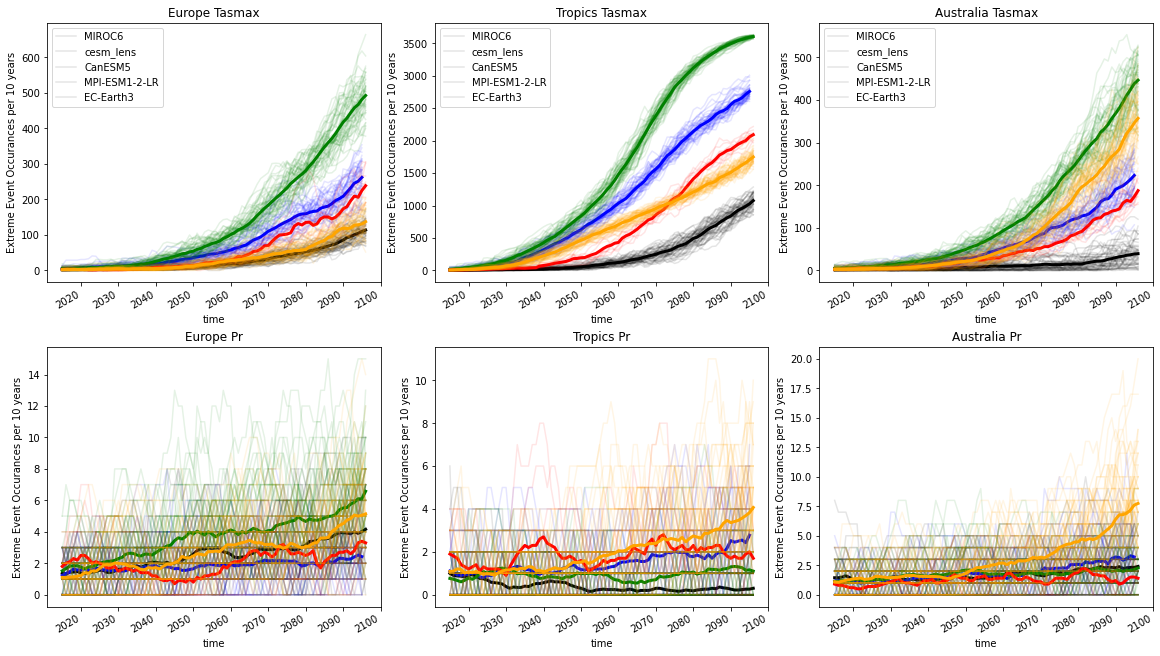

In [188]:
# Figure 1
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
colors = ['k','b','g','r','orange']
axes = [ax[0,0],ax[0,1],ax[0,2]]
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
for m in range(len(tas.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = tas.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3,add_legend=True)
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')
        labels = ['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3']
        axis.legend(labels=labels)   # not sure why colors arent appearing
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for m in range(len(pr.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = pr.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3)
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')

In [189]:
# define total and total ideal with scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr

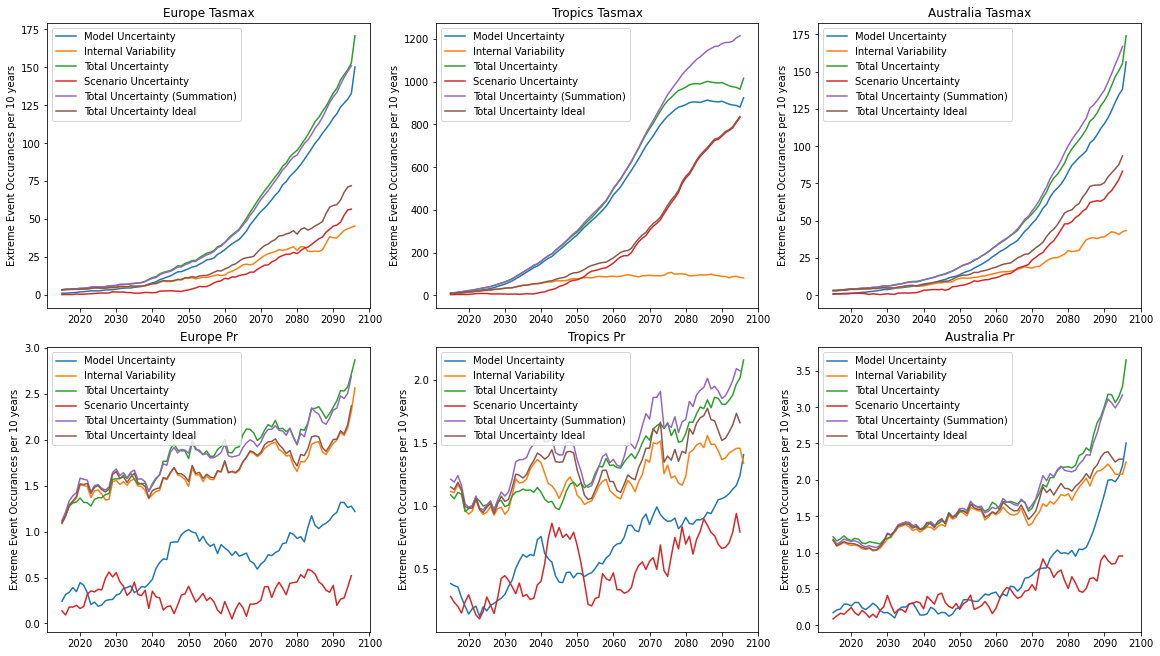

In [190]:
# Figure 2
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_tas.sel(region=r).time,np.sqrt(S_tas.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_tas.sel(region=r).time,np.sqrt(total_tas.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_tas_ideal.sel(region=r).time,np.sqrt(total_tas_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_pr.sel(region=r).time,np.sqrt(S_pr.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_pr.sel(region=r).time,np.sqrt(total_pr.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_pr_ideal.sel(region=r).time,np.sqrt(total_pr_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [191]:
# total and total ideal without scenario uncertainty 
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE 
total_tas_ideal = internal_tas.Ibar_LE 
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE
total_pr_ideal = internal_pr.Ibar_LE 

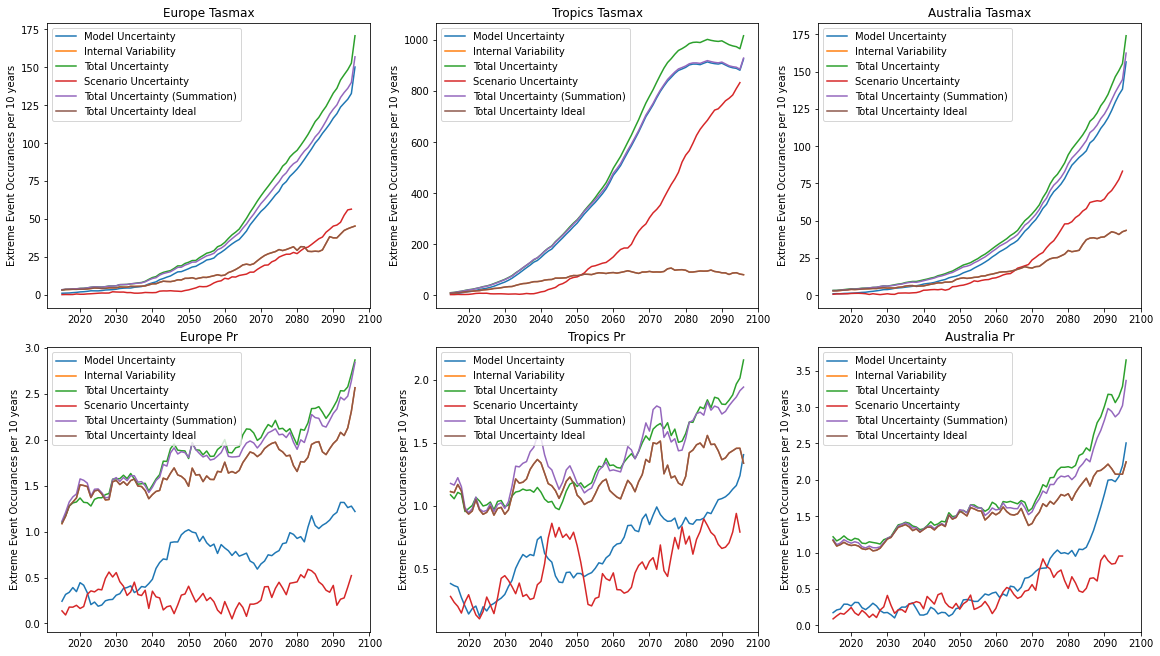

In [192]:
# Figure 2
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_tas.sel(region=r).time,np.sqrt(S_tas.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_tas.sel(region=r).time,np.sqrt(total_tas.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_tas_ideal.sel(region=r).time,np.sqrt(total_tas_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,np.sqrt(region.M_LE), label = 'Model Uncertainty')
    axis.plot(region.time,np.sqrt(region.Ibar_LE),label='Internal Variability')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Uncertainty')
    axis.plot(S_pr.sel(region=r).time,np.sqrt(S_pr.sel(region=r)),label='Scenario Uncertainty')
    axis.plot(total_pr.sel(region=r).time,np.sqrt(total_pr.sel(region=r)),label= 'Total Uncertainty (Summation)')
    axis.plot(total_pr_ideal.sel(region=r).time,np.sqrt(total_pr_ideal.sel(region=r)),label= 'Total Uncertainty Ideal')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [193]:
# calculations for percent contribution plots, including scenario uncertainty
total_tas = internal_tas.M_LE + internal_tas.Ibar_LE + S_tas
total_tas_ideal = internal_tas.Ibar_LE + S_tas
total_pr = internal_pr.M_LE + internal_pr.Ibar_LE + S_pr
total_pr_ideal = internal_pr.Ibar_LE + S_pr

M_frac_tas = (internal_tas.M_LE / total_tas)*100
I_frac_tas = (internal_tas.Ibar_LE / total_tas)*100
S_frac_tas = (S_tas / total_tas)*100
M_frac_pr = (internal_pr.M_LE / total_pr)*100
I_frac_pr = (internal_pr.Ibar_LE / total_pr)*100
S_frac_pr = (S_pr / total_pr)*100

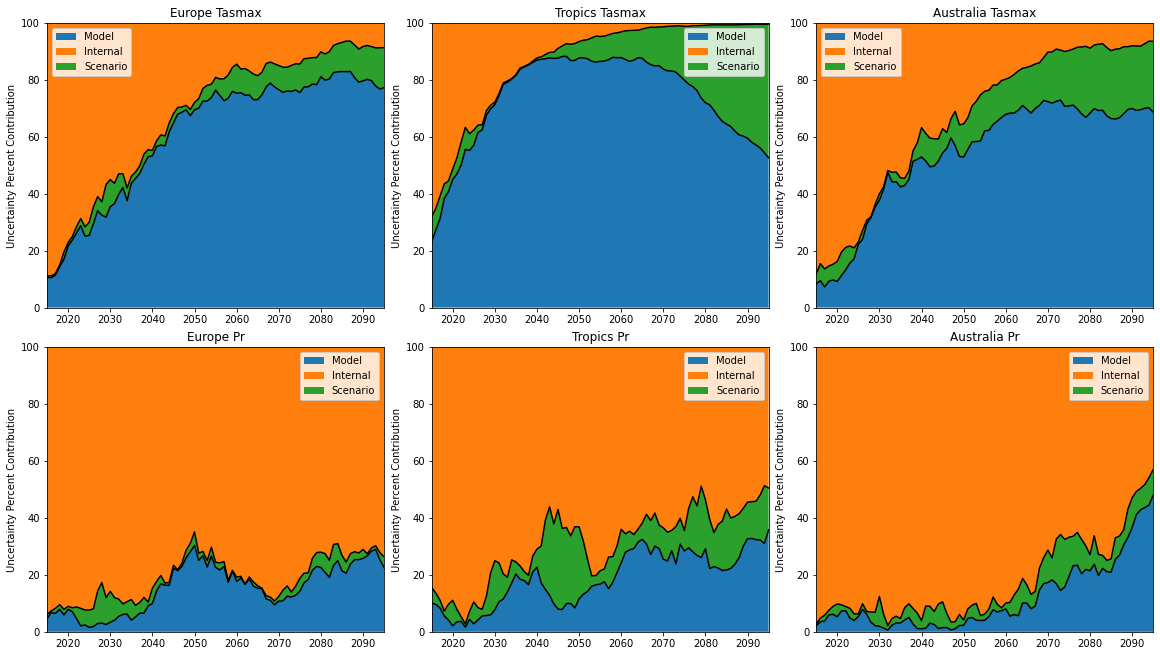

In [194]:
# Figure 3
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    x = internal_tas.sel(region=r).time
    y1 = M_frac_tas.sel(region=r)
    y2 = y1 + S_frac_tas.sel(region=r)
    axis.fill_between(x,0,y1,label='Model')
    axis.fill_between(x,y2,100,label='Internal')
    axis.fill_between(x,y1,y2,label='Scenario')
    axis.plot(x,y1,color='k')
    axis.plot(x,y2,color='k')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Uncertainty Percent Contribution')
    axis.set_ylim(0,100)
    axis.set_xlim(x[0],x[-5])
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    x = internal_pr.sel(region=r).time
    y1 = M_frac_pr.sel(region=r)
    y2 = y1 + S_frac_pr.sel(region=r)
    axis.fill_between(x,0,y1,label='Model')
    axis.fill_between(x,y2,100,label='Internal')
    axis.fill_between(x,y1,y2,label='Scenario')
    axis.plot(x,y1,color='k')
    axis.plot(x,y2,color='k')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Uncertainty Percent Contribution')
    axis.set_ylim(0,100)
    axis.set_xlim(x[0],x[-5])

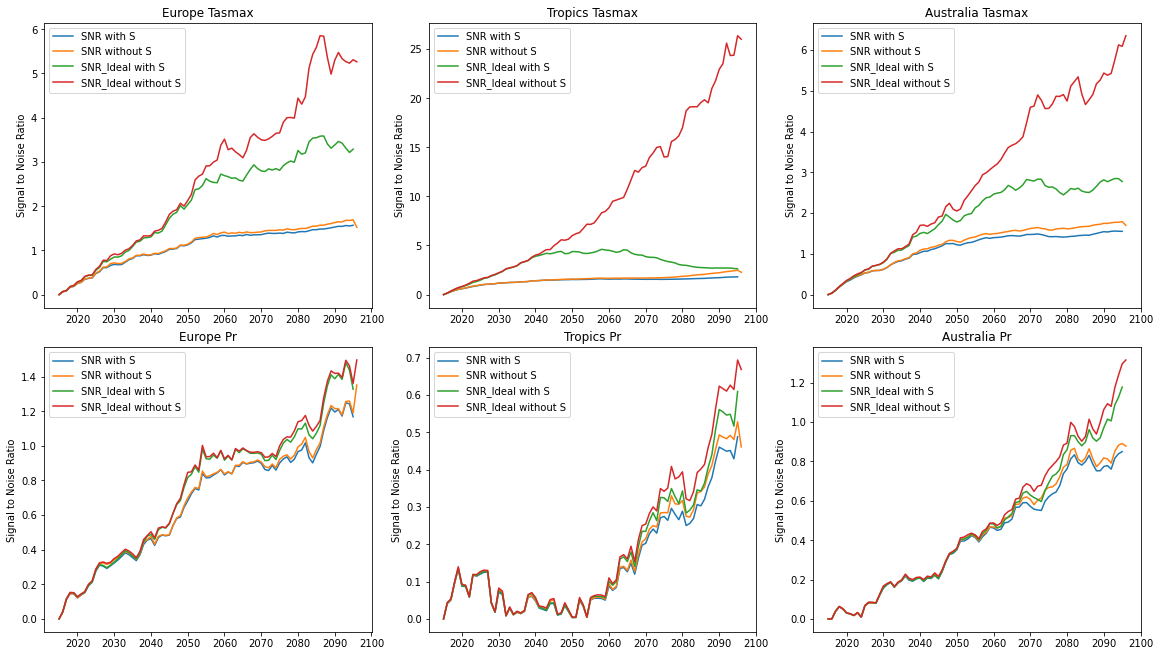

In [195]:
# Figure 4
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    axis.plot(SNR_tas.sel(region=r).time,SNR_tas.sel(region=r),label='SNR with S')
    axis.plot(SNR_tas1.sel(region=r).time,SNR_tas1.sel(region=r),label='SNR without S')
    axis.plot(SNR_ideal_tas.sel(region=r).time,SNR_ideal_tas.sel(region=r),
              label='SNR_Ideal with S')
    axis.plot(SNR_ideal_tas1.sel(region=r).time,SNR_ideal_tas1.sel(region=r),
              label='SNR_Ideal without S')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Signal to Noise Ratio')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    axis.plot(SNR_pr.sel(region=r).time,SNR_pr.sel(region=r),label='SNR with S')
    axis.plot(SNR_pr1.sel(region=r).time,SNR_pr1.sel(region=r),label='SNR without S')
    axis.plot(SNR_ideal_pr.sel(region=r).time,SNR_ideal_pr.sel(region=r),
              label='SNR_Ideal with S')
    axis.plot(SNR_ideal_pr1.sel(region=r).time,SNR_ideal_pr1.sel(region=r),
              label='SNR_Ideal without S')

    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Signal to Noise Ratio')

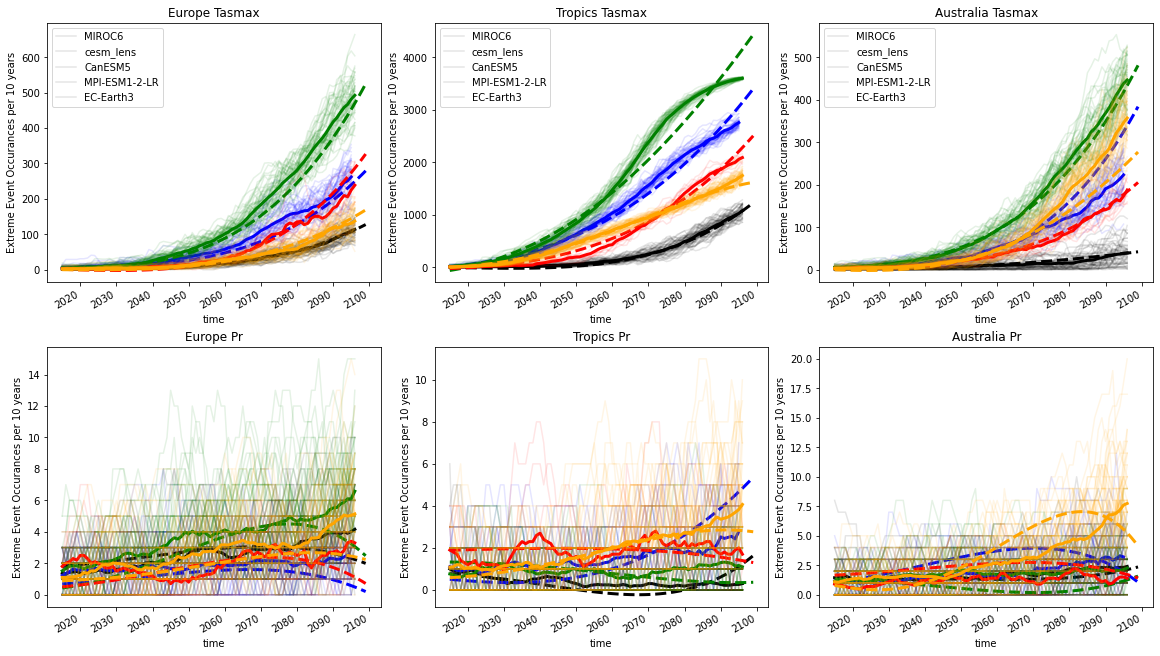

In [200]:
# Polynomial FIT method vs LE 
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
colors = ['k','b','g','r','orange']
axes = [ax[0,0],ax[0,1],ax[0,2]]
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
for m in range(len(tas.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = tas.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3,add_legend=True)
        internal_tas.sel(region=r).isel(model=m).FIT.plot(ax=axis,color=colors[m],
                                                          linewidth=3,linestyle='dashed')
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')
        labels = ['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3']
        axis.legend(labels=labels)   # not sure why colors arent appearing
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for m in range(len(pr.model)):
    for axis,r,t in zip(axes,regions,titles):
        region = pr.sel(region=r)
        region.isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m],ax=axis,alpha=0.1)
        region.isel(model=m).mean('member_id').plot(ax=axis,color=colors[m],linewidth=3)
        internal_pr.sel(region=r).isel(model=m).FIT.plot(ax=axis,color=colors[m],
                                                          linewidth=3,linestyle='dashed')
        axis.set_title(t)
        axis.set_ylabel('Extreme Event Occurances per 10 years')

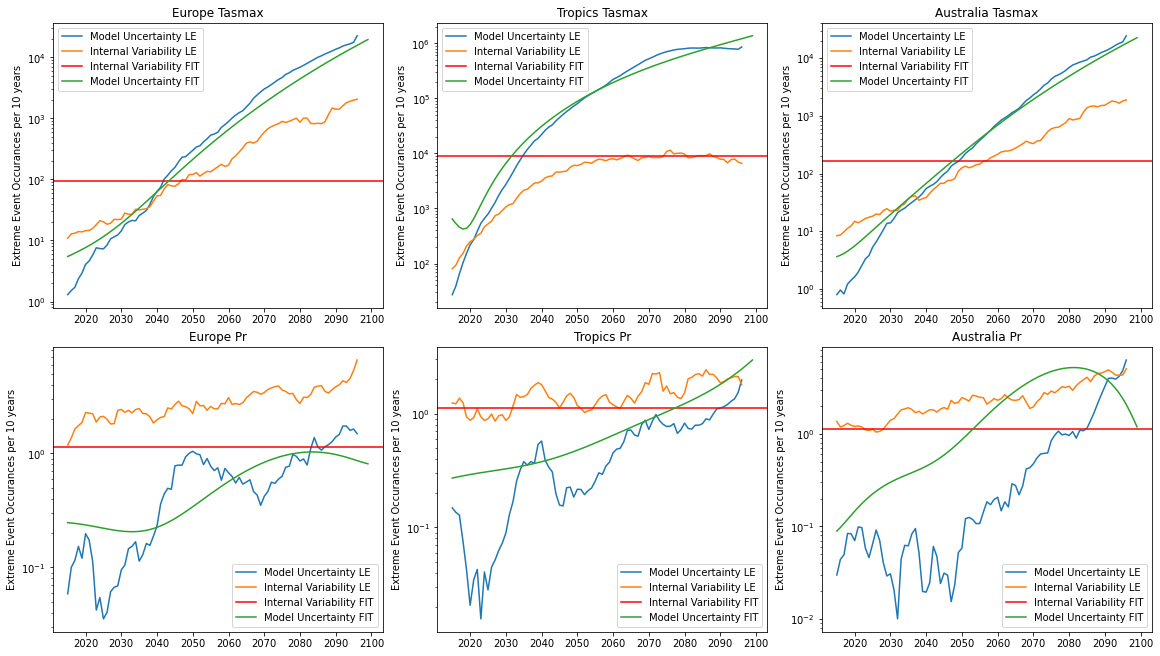

In [207]:
# FIT vs LE method (internal and model uncertainty )
fig,ax = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(16,9))

regions = ['region1','region2','region3']
titles = ['Europe Tasmax','Tropics Tasmax','Australia Tasmax']
axes = [ax[0,0],ax[0,1],ax[0,2]]
for axis,r,t in zip(axes,regions,titles):
    region = internal_tas.sel(region=r)
    axis.plot(region.time,region.M_LE, label = 'Model Uncertainty LE')
    axis.plot(region.time,region.Ibar_LE,label='Internal Variability LE')
    axis.axhline(region.Ibar_FIT,label='Internal Variability FIT',color='r')
    axis.plot(region.time,region.M_FIT,label='Model Uncertainty FIT')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')
    axis.set_yscale('log')
axes = [ax[1,0],ax[1,1],ax[1,2]]
titles = ['Europe Pr','Tropics Pr','Australia Pr']
for axis,r,t in zip(axes,regions,titles):
    region = internal_pr.sel(region=r)
    axis.plot(region.time,region.M_LE, label = 'Model Uncertainty LE')
    axis.plot(region.time,region.Ibar_LE,label='Internal Variability LE')
    axis.axhline(region.Ibar_FIT,label='Internal Variability FIT',color='r')
    axis.plot(region.time,region.M_FIT,label='Model Uncertainty FIT')
    axis.set_yscale('log')
    axis.legend()
    axis.set_title(t)
    axis.set_ylabel('Extreme Event Occurances per 10 years')

In [241]:
tas_scenario_results = tas_scenario_results.sel(time=slice('2015',None))
pr_scenario_results = pr_scenario_results.sel(time=slice('2015',None))

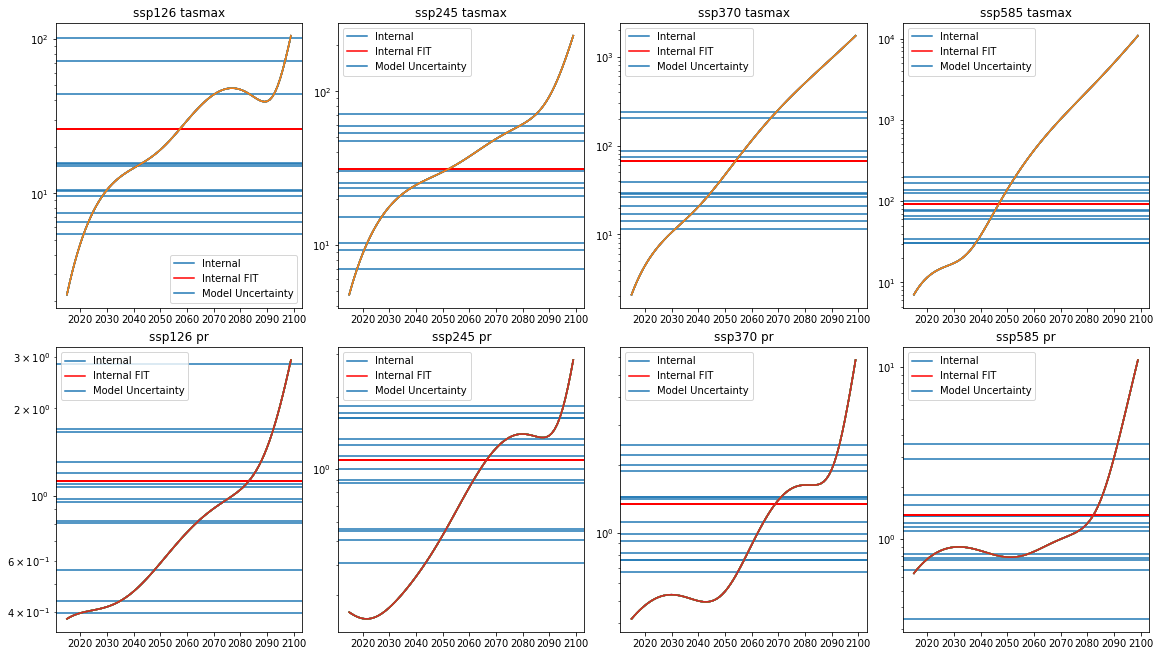

In [242]:
# scenario affect on variabilities for Europe 
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=0,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=0,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=0,scenario=s).time,
                 tas_scenario_results.isel(region=0,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=0,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=0,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=0,scenario=s).time,
                 pr_scenario_results.isel(region=0,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

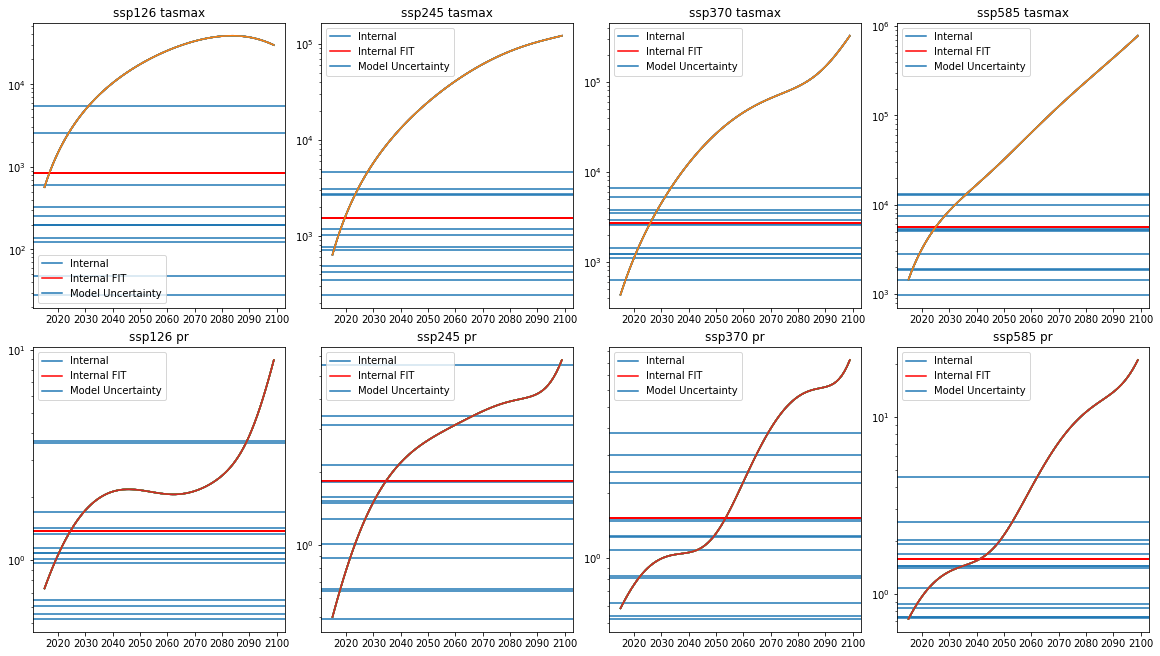

In [243]:
# scenario affect on variabilities for Tropics
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=1,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=1,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=1,scenario=s).time,
                 tas_scenario_results.isel(region=1,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=1,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=1,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=1,scenario=s).time,
                 pr_scenario_results.isel(region=1,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

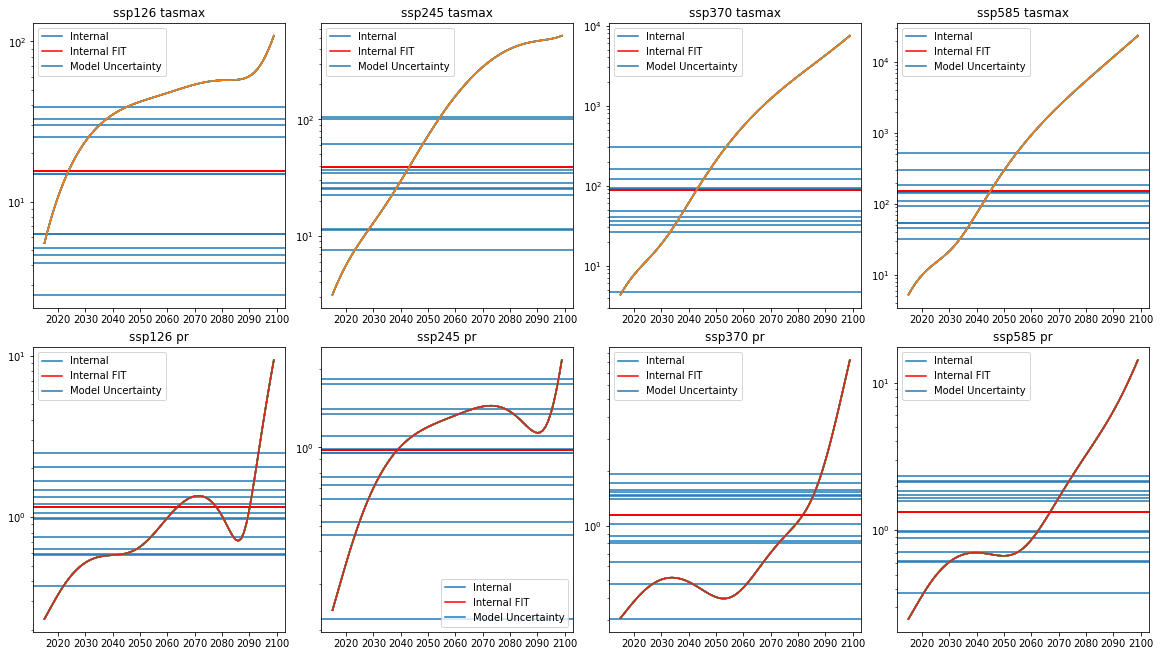

In [245]:
# scenario affect on variabilities for Australia 
fig,ax = plt.subplots(nrows=2,ncols=4, constrained_layout=True,figsize=(16,9))

axes = [ax[0,0],ax[0,1],ax[0,2],ax[0,3]]
titles = ['ssp126 tasmax','ssp245 tasmax','ssp370 tasmax','ssp585 tasmax']
for s,axis,t in zip(range(len(tas_scenario_results.scenario)),axes,titles):
    for m in range(len(tas_scenario_results.model)):
        axis.axhline(tas_scenario_results.isel(region=2,scenario=s,model=m).I_FIT)
        axis.axhline(tas_scenario_results.isel(region=2,scenario=s).Ibar_FIT,color='r')
        axis.plot(tas_scenario_results.isel(region=2,scenario=s).time,
                 tas_scenario_results.isel(region=2,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)
        
axes = [ax[1,0],ax[1,1],ax[1,2],ax[1,3]]
titles = ['ssp126 pr','ssp245 pr','ssp370 pr','ssp585 pr']
for s,axis,t in zip(range(len(pr_scenario_results.scenario)),axes,titles):
    for m in range(len(pr_scenario_results.model)):
        axis.axhline(pr_scenario_results.isel(region=2,scenario=s,model=m).I_FIT)
        axis.axhline(pr_scenario_results.isel(region=2,scenario=s).Ibar_FIT,color='r')
        axis.plot(pr_scenario_results.isel(region=2,scenario=s).time,
                 pr_scenario_results.isel(region=2,scenario=s).M_FIT)
        axis.set_yscale('log')
        axis.set_title(t)
        labels = ['Internal','Internal FIT','Model Uncertainty']
        axis.legend(labels=labels)

## loading by location

In [3]:
# setting 
variable = 'tas'
# variable = 'tasmax'
# variable = 'pr'
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [4]:
USwest = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=37.7, lon=237.6, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [5]:
europe = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=51, lon=10.5, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [6]:
australia = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=-25.2, lon=133.7, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [7]:
tropics = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=3.9, lon=306.9, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

### Compute variabilities 

In [20]:
USwest.compute_x(x_type='quantile_return',load=True,name='USwest_internal_tas')
USwest.compute_LE()
USwest.compute_FIT()
USwest_internal = USwest.results.squeeze()

In [17]:
europe.compute_x(x_type='quantile_return',load=False,name='europe_internal_tas')
europe.compute_LE()
europe.compute_FIT()
europe_internal = europe.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

1.6518402099609375
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

1.6497039794921875
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

1.65643310546875
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

1.6574783325195312
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

1.6640548706054688
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/europe_internal_tas/cesm_lens.zarr


In [18]:
australia.compute_x(x_type='quantile_return',load=False,name='australia_internal_tas')
australia.compute_LE()
australia.compute_FIT()
australia_internal = australia.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6724472045898438
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

1.6681175231933594
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

1.6689109802246094
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

1.6669464111328125
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

1.6953239440917969
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/australia_internal_tas/cesm_lens.zarr


In [19]:
tropics.compute_x(x_type='quantile_return',load=False,name='tropics_internal_tas')
tropics.compute_LE()
tropics.compute_FIT()
tropics_internal = tropics.results.squeeze()

100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

1.6721305847167969
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/MIROC6.zarr



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6629562377929688
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/CanESM5.zarr



100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

1.6624069213867188
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/MPI-ESM1-2-LR.zarr



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

1.6800727844238281
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/EC-Earth3.zarr



100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

1.6795692443847656
Saving: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tropics_internal_tas/cesm_lens.zarr


In [22]:
# merge datasets by region
regions = [USwest_internal,europe_internal,australia_internal,tropics_internal]
dss = []
for region in regions:
    internal = region.expand_dims('region')
    dss.append(internal)
regions = ['USwest','europe','australia','tropics']
internal = xr.concat(dss,dim='region')
internal = internal.assign_coords({'region':regions})

In [31]:
internal.time[95]

<xarray.DataArray 'time' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-01-01

In [25]:
internal['M_LE_frac'] = (internal.M_LE/(internal.Ibar_LE+internal.M_LE))*100
internal['M_FIT_frac'] = (internal.M_FIT/(internal.Ibar_FIT+internal.M_FIT))*100
internal['I_LE_frac'] = (internal.Ibar_LE/(internal.Ibar_LE+internal.M_LE))*100
internal['I_FIT_frac'] = (internal.Ibar_FIT/(internal.Ibar_FIT+internal.M_FIT))*100

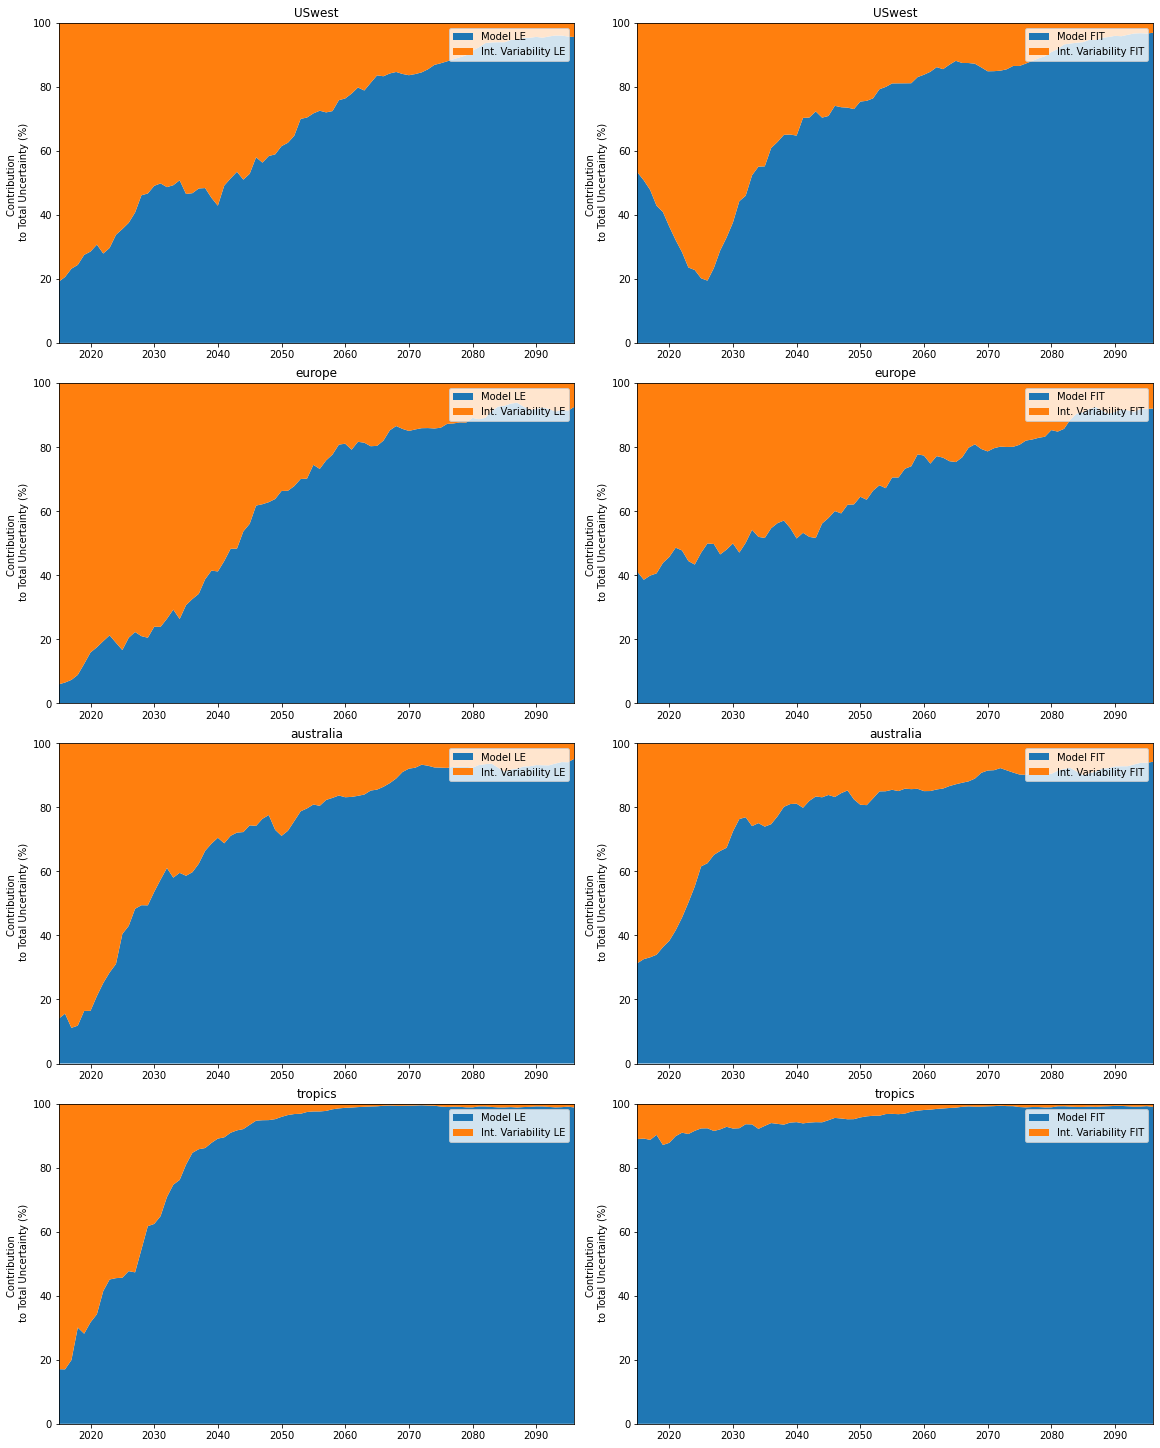

In [67]:
# INTERNAL MEAN
fig,ax = plt.subplots(nrows=4,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).M_LE_frac
    axis.fill_between(x,y,label='Model LE')
    # axis.plot(internal.sel(region=region).time,internal.sel(region=region).M_LE_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[95],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).M_FIT_frac
    axis.fill_between(x,y,label='Model FIT')
    # axis.plot(internal.sel(region=region).time,internal.sel(region=region).M_FIT_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[95],x[-5])

In [33]:
internal

<xarray.Dataset>
Dimensions:     (time: 181, region: 4, model: 5, member_id: 71)
Coordinates:
  * time        (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
    lat         (region) float64 37.5 50.0 -25.0 5.0
    lon         (region) float64 237.5 10.0 132.5 307.5
  * model       (model) <U13 'MIROC6' 'CanESM5' ... 'EC-Earth3' 'cesm_lens'
    quantile    (model) float64 0.9997 0.9997 0.9997 0.9997 0.9997
    q_values    (region, model) float64 299.7 300.6 299.2 ... 303.0 301.9 300.1
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71
  * region      (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/13)
    M_LE        (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_LE        (region, model, time) float64 dask.array<chunksize=(1, 1, 181), meta=np.ndarray>
    Ibar_LE     (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    T_LE        (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    FIT         (region, time, model) float64 dask.array<chunksize=(1, 181, 1), meta=np.ndarray>
    M_FIT       (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    ...          ...
    Ibar_FIT    (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    T_FIT       (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    M_LE_frac   (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    M_FIT_frac  (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_LE_frac   (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>
    I_FIT_frac  (region, time) float64 dask.array<chunksize=(1, 181), meta=np.ndarray>

In [34]:
internal['total_LE'] = internal.Ibar_LE + internal.M_LE
internal['total_FIT'] = internal.Ibar_FIT + internal.M_FIT

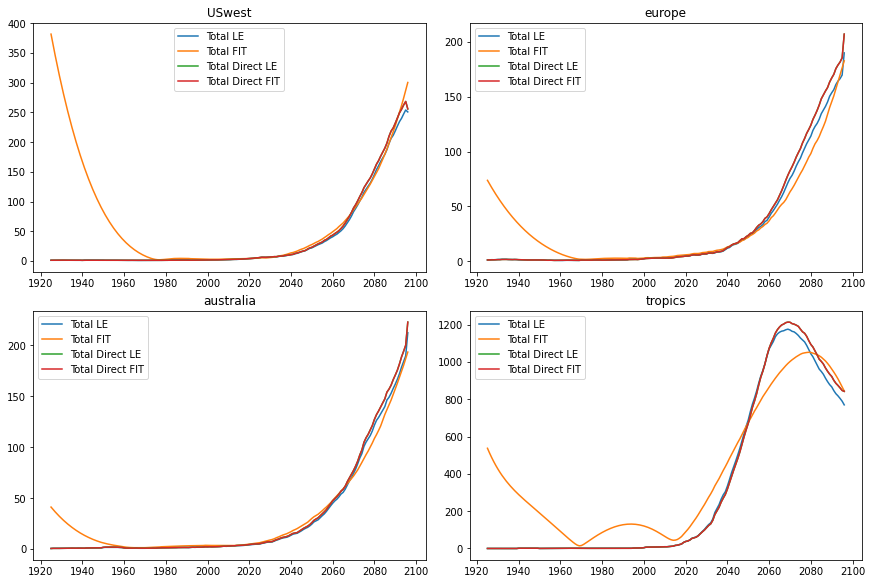

In [61]:
# INTERNAL MEAN
fig,ax = plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

regions = ['USwest','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
for axis,r in zip(axes,regions):
    region = internal.sel(region=r)
    axis.plot(region.time,np.sqrt(region.total_LE), label = 'Total LE')
    axis.plot(region.time,np.sqrt(region.total_FIT),label='Total FIT')
    axis.plot(region.time,np.sqrt(region.T_LE),label='Total Direct LE')
    axis.plot(region.time,np.sqrt(region.T_FIT),label='Total Direct FIT')
    axis.legend()
    axis.set_title(r)
# what are these units??

In [78]:
USwest.x

<xarray.DataArray 'tas' (model: 5, member_id: 71, time: 181, lat: 1, lon: 1)>
dask.array<concatenate, shape=(5, 71, 181, 1, 1), dtype=float64, chunksize=(1, 71, 181, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * model      (model) <U13 'MIROC6' 'CanESM5' ... 'EC-Earth3' 'cesm_lens'
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71
  * time       (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * lat        (lat) float64 37.5
  * lon        (lon) float64 237.5
    q_values   (model, lat, lon) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    quantile   (model) float64 0.9997 0.9997 0.9997 0.9997 0.9997

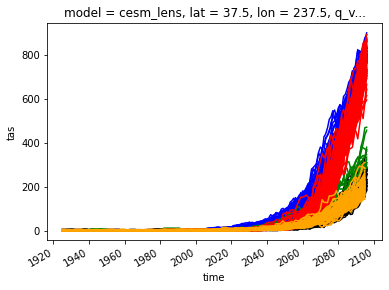

In [87]:
colors = ['k','b','g','r','orange']
for m in range(len(USwest.x.model)):
    USwest.x.squeeze().isel(model=m).plot(hue='member_id',add_legend=False,color=colors[m]);

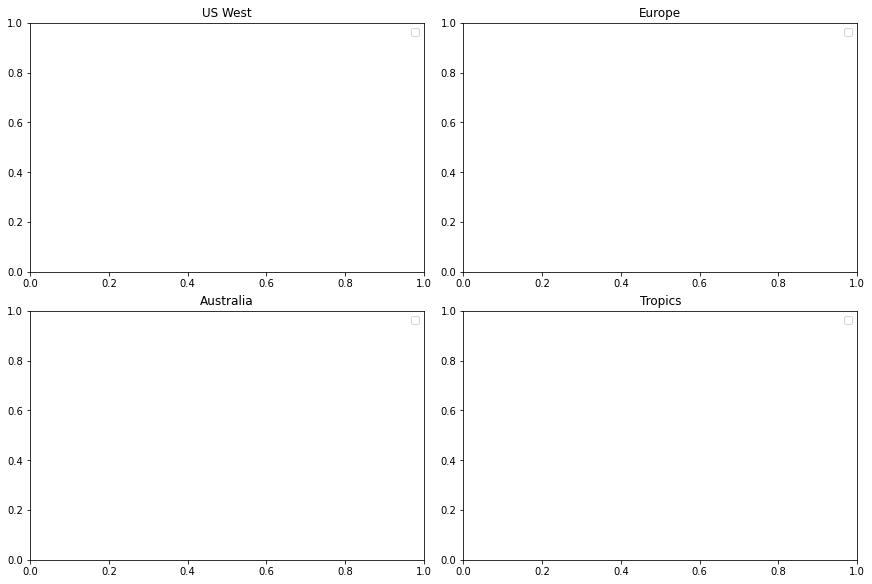

In [81]:
fig, axe = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(12,8))
regions = [USwest,europe,australia,tropics]
axes = [axe[0,0],axe[0,1],axe[1,0],axe[1,1]]
titles = ['US West', 'Europe', 'Australia', 'Tropics']
for r,a,t in zip(regions,axes,titles):
    for m in range(len(USwest.x.model)):
        a.plot(r.x.time,r.x.isel(model=m).squeeze().mean(dim=['member_id']))
        r.x.squeeze().isel(model=m).plot(hue='member_id',ax=axis)
    labels = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3', 'cesm_lens']
    a.legend(labels=labels)
    a.set_title(t)